# CLASSIFICATION

In this project we take data of HR-Employee-Attrition Dataset and try to classify the attrition rate of the employees.

The data includes 1470 rows and 34 columns - including attrition, what we are trying to classify

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
from feature_engine import missing_data_imputers as mdi
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [139]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [140]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                 1          2  Life Sciences              1   
1                 8          1  Life Sciences              1   
2                 2          2          Other              1   
3                 3          4  Life Sciences              1   
4                 2          1        Medical              1   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1           80.0   
1                        3  ...                        4           80.0   
2                        4  ...                        2           80.0   
3                        4  ...                        3           80.0   
4                        1  ...                        4           80.0   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                8.0                     0                1   
1                 1               10.0                     3                3   
2                 0                7.0                     3                3   
3                 0                8.0                     3                3   
4                 1                6.0                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0            6.0                 4.0                        0   
1           10.0                 7.0                        1   
2            0.0                 0.0                        0   
3            8.0                 7.0                        3   
4            2.0                 2.0                        2   

   YearsWithCurrManager  
0                   5.0  
1                   7.0  
2                   0.0  
3                   0.0  
4                   2.0  

[5 rows x 34 columns]

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [142]:
# Looking for NaN
data.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                9
MonthlyIncome               10
MonthlyRate                  9
NumCompaniesWorked           0
Over18                       0
OverTime                    14
PercentSalaryHike            8
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours               23
StockOptionLevel             0
TotalWorkingYears           57
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              12
YearsInCurrentRole          33
YearsSin

In [143]:
null_col = []
for col in data.columns:
    null_count = sum((data[col].isnull()))
    if null_count > 0:
        print(col,":",null_count)
        null_col.append(col)

MaritalStatus : 9
MonthlyIncome : 10
MonthlyRate : 9
OverTime : 14
PercentSalaryHike : 8
StandardHours : 23
TotalWorkingYears : 57
YearsAtCompany : 12
YearsInCurrentRole : 33
YearsWithCurrManager : 10


## Data Visualization

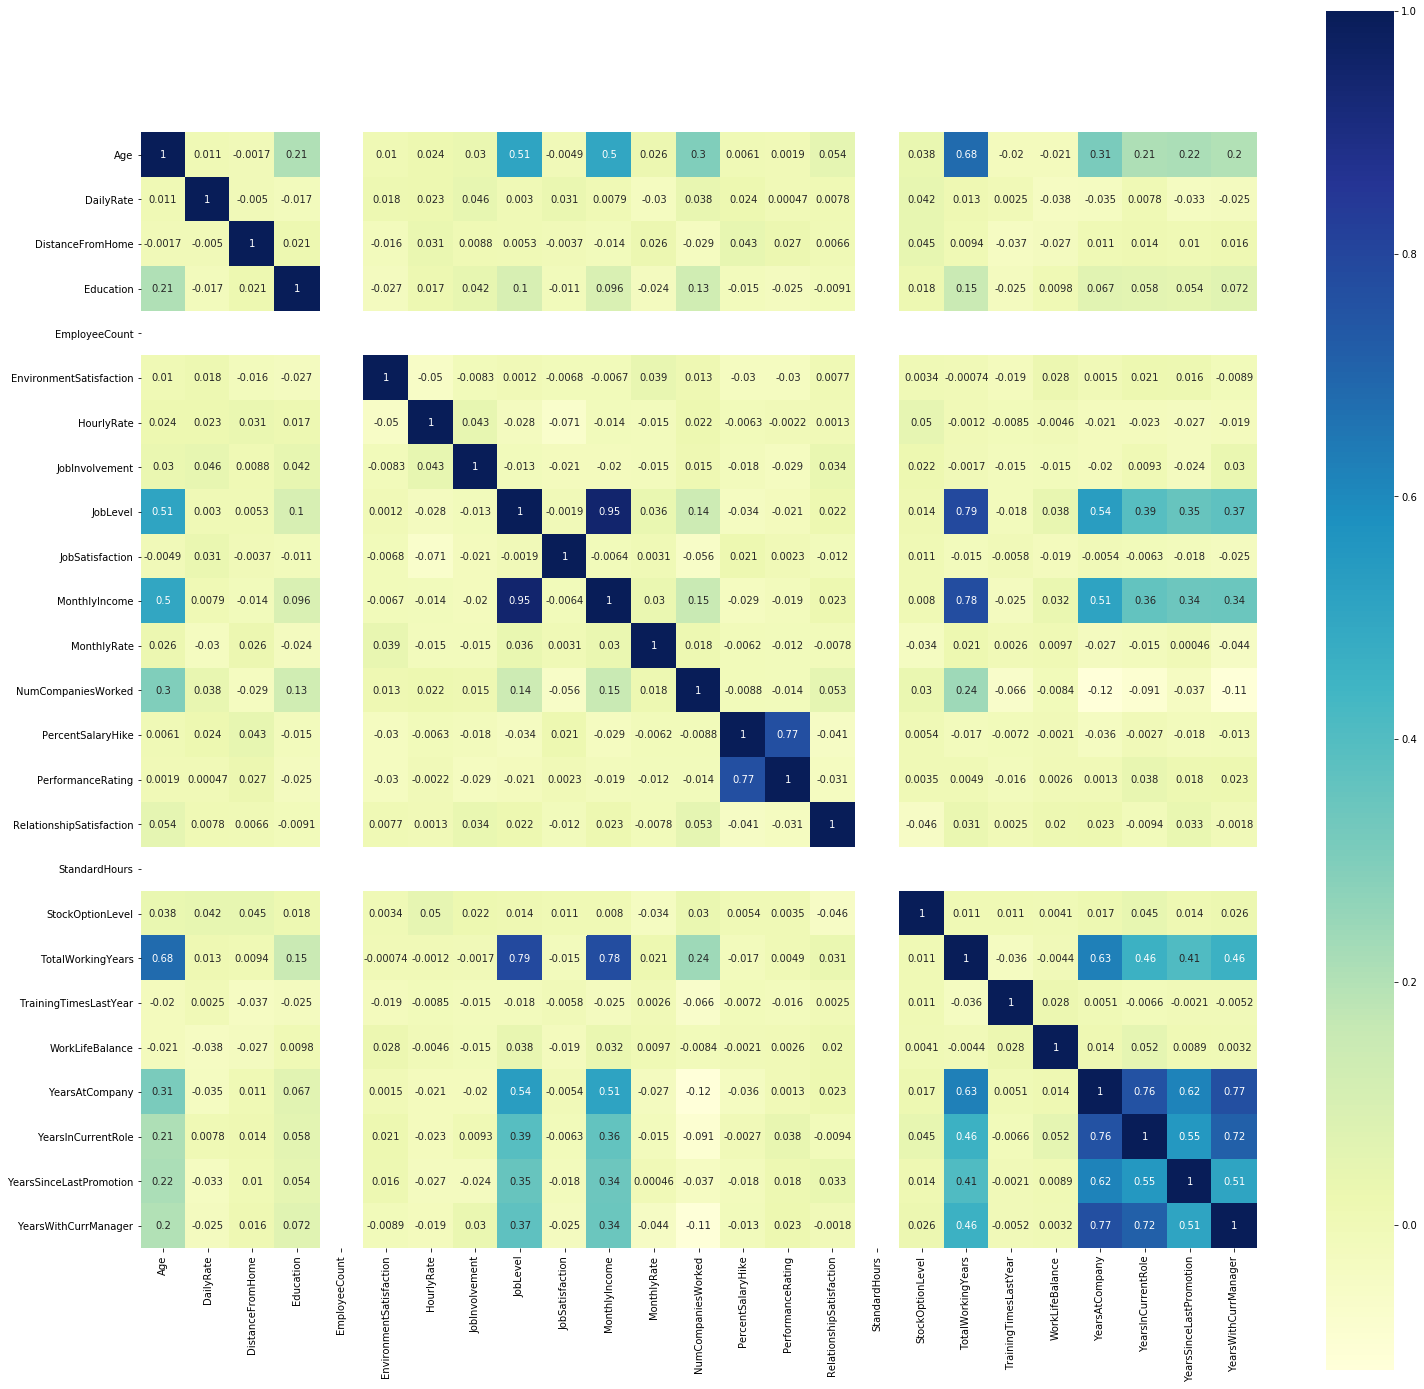

In [52]:
import seaborn as sns
f, ax = plt.subplots(figsize=(25, 25))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True,square=True, ax=ax,cmap="YlGnBu")

In [53]:
sns.set()
ser= data.columns
sns.pairplot(data[ser],height =4)
plt.show()

In [54]:
num_columns=data.select_dtypes(exclude="object").columns

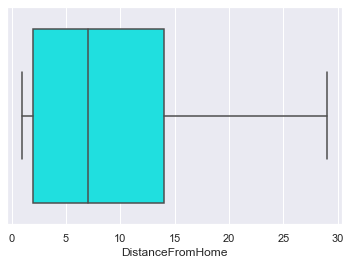

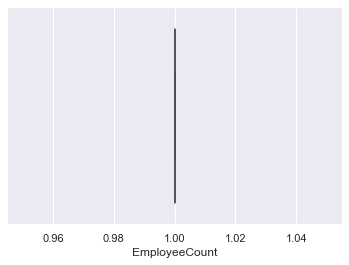

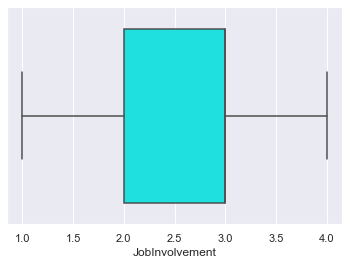

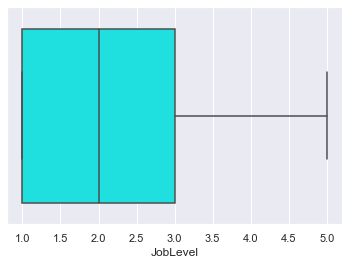

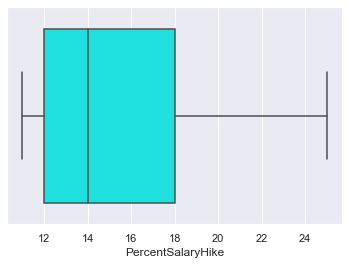

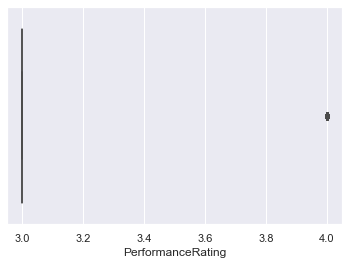

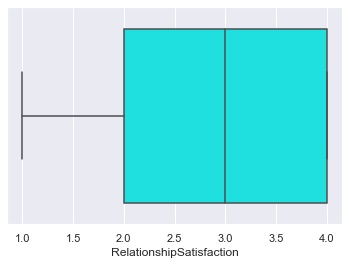

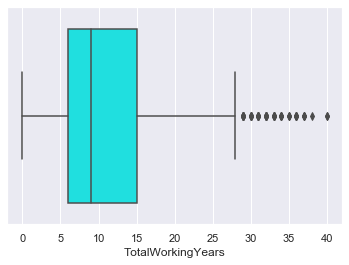

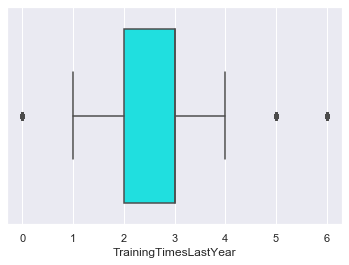

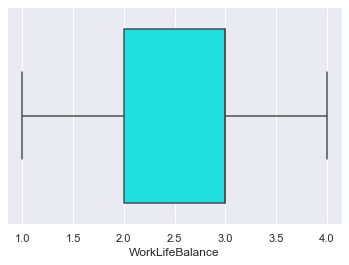

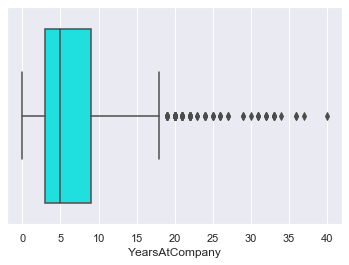

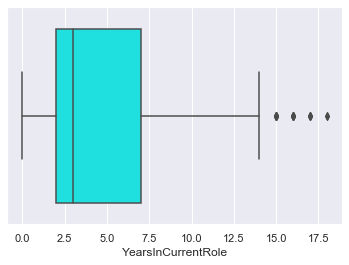

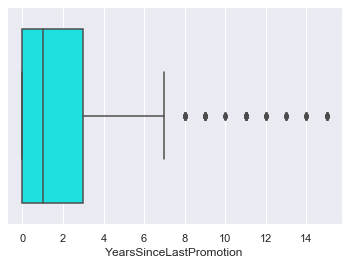

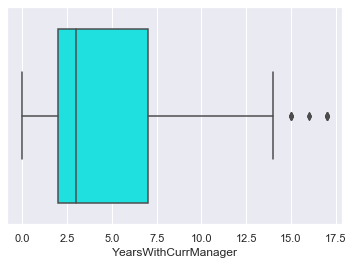

In [55]:
for i in num_columns:
    sns.boxplot(data[i],color="cyan");
    plt.show();

## Missing Data Imputation

In [144]:
data['MonthlyIncome'] = data['MonthlyIncome'].fillna((data['MonthlyIncome'].mean()))
data['MonthlyRate'] = data['MonthlyRate'].fillna((data['MonthlyRate'].mean()))
data['PercentSalaryHike'] = data['PercentSalaryHike'].fillna((data['PercentSalaryHike'].mean()))
data['StandardHours'] = data['StandardHours'].fillna((data['StandardHours'].mean()))
data['TotalWorkingYears'] = data['TotalWorkingYears'].fillna((data['TotalWorkingYears'].mean()))
data['YearsAtCompany'] = data['YearsAtCompany'].fillna((data['YearsAtCompany'].mean()))
data['YearsInCurrentRole'] = data['YearsInCurrentRole'].fillna((data['YearsInCurrentRole'].mean()))
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].fillna((data['YearsWithCurrManager'].mean()))

In [145]:
data['MaritalStatus'].mode()

0    Married
dtype: object

In [146]:
data['MaritalStatus'].fillna(data['MaritalStatus'].mode()[0],inplace=True)

In [147]:
data['OverTime'].mode()

0    No
dtype: object

In [148]:
data['OverTime'].fillna(data['OverTime'].mode()[0],inplace=True)

In [149]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [150]:
data.describe(include = 'O')

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           678   1470     1059

In [151]:
data['Attrition'] = data['Attrition'].map({'Yes':0, 'No':1})
data['Gender'] = data['Gender'].map({'Female':0, 'Male':1})
data['OverTime'] = data['OverTime'].map({'Yes':0, 'No':1})
data['Over18'] = data['Over18'].map({'Y':0})
data['EducationField'] = data['EducationField'].map({'Life Sciences':0, 'Other':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Human Resources':5})
data['JobRole'] = data['JobRole'].map({'Sales Executive':0, 'Research Scientist':1, 'Laboratory Technician':2, 'Manufacturing Director':3, 'Healthcare Representative':4, 'Manager':5, 'Sales Representative':6, 'Research Director':7, 'Human Resources':8})

In [152]:
data=pd.concat((data,pd.get_dummies(data['BusinessTravel'])),axis=1)
data=pd.concat((data,pd.get_dummies(data['Department'])),axis=1)
data=pd.concat((data,pd.get_dummies(data['MaritalStatus'])),axis=1)

In [153]:
data=data.drop(['BusinessTravel','Department','MaritalStatus'],axis=1)

In [154]:
data.describe()

Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.838776   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     1.000000   465.000000          2.000000     2.000000   
50%      36.000000     1.000000   802.000000          7.000000     3.000000   
75%      43.000000     1.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EducationField  EmployeeCount  EnvironmentSatisfaction       Gender  \
count     1470.000000         1470.0              1470.000000  1470.000000   
mean         1.462585            1.0                 2.721769     0.600000   
std          1.431780            0.0                 1.093082     0.490065   
min          0.000000            1.0                 1.000000     0.000000   
25%          0.000000            1.0                 2.000000     0.000000   
50%          2.000000            1.0                 3.000000     1.000000   
75%          2.000000            1.0                 4.000000     1.000000   
max          5.000000            1.0                 4.000000     1.000000   

        HourlyRate  ...  YearsWithCurrManager   Non-Travel  Travel_Frequently  \
count  1470.000000  ...           1470.000000  1470.000000        1470.000000   
mean     65.891156  ...              4.119863     0.102041           0.188435   
std      20.329428  ...              3.557562     0.302805           0.391193   
min      30.000000  ...              0.000000     0.000000           0.000000   
25%      48.000000  ...              2.000000     0.000000           0.000000   
50%      66.000000  ...              3.000000     0.000000           0.000000   
75%      83.750000  ...              7.000000     0.000000           0.000000   
max     100.000000  ...             17.000000     1.000000           1.000000   

       Travel_Rarely  Human Resources  Research & Development        Sales  \
count    1470.000000      1470.000000             1470.000000  1470.000000   
mean        0.709524         0.042857                0.653741     0.303401   
std         0.454137         0.202604                0.475939     0.459884   
min         0.000000         0.000000                0.000000     0.000000   
25%         0.000000         0.000000                0.000000     0.000000   
50%         1.000000         0.000000                1.000000     0.000000   
75%         1.000000         0.000000                1.000000     1.000000   
max         1.000000         1.000000                1.000000     1.000000   

          Divorced      Married       Single  
count  1470.000000  1470.000000  1470.000000  
mean      0.220408     0.461224     0.318367  
std       0.414663     0.498664     0.466001  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000  

[8 rows x 40 columns]

### Splitting the data

In [196]:
target = data['Attrition']
y = pd.DataFrame(target)
y.head()

Attrition
0          0
1          1
2          0
3          1
4          1

In [197]:
X =data.drop(['Attrition'],axis=1)
X.head()

Age  DailyRate  DistanceFromHome  Education  EducationField  EmployeeCount  \
0   41       1102                 1          2               0              1   
1   49        279                 8          1               0              1   
2   37       1373                 2          2               1              1   
3   33       1392                 3          4               0              1   
4   27        591                 2          1               2              1   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  ...  \
0                        2       0          94               3  ...   
1                        3       1          61               2  ...   
2                        4       1          92               2  ...   
3                        4       0          56               3  ...   
4                        1       1          40               3  ...   

   YearsWithCurrManager  Non-Travel  Travel_Frequently  Travel_Rarely  \
0                   5.0           0                  0              1   
1                   7.0           0                  1              0   
2                   0.0           0                  0              1   
3                   0.0           0                  1              0   
4                   2.0           0                  0              1   

   Human Resources  Research & Development  Sales  Divorced  Married  Single  
0                0                       0      1         0        0       1  
1                0                       1      0         0        1       0  
2                0                       1      0         0        0       1  
3                0                       1      0         0        1       0  
4                0                       1      0         0        1       0  

[5 rows x 39 columns]

In [198]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

### Scaling the Data

#### We used Standard scaling as features in the dataset had outliers; all the features were normalized to unit variance for better estimation of the various machine learning algorithms utilized in the project.

In [199]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [200]:
X_train = pd.DataFrame(X_train, columns = X_train_org.columns)
print('Train dataset dimensionality:' , X_train.shape)
print('Train dataset dimensionality:' , y_train.shape)

Train dataset dimensionality: (1102, 39)
Train dataset dimensionality: (1102, 1)


In [201]:
X_test = pd.DataFrame(X_test, columns = X_test_org.columns)
print('Test dataset dimensionality:' , X_test.shape)
print('Train dataset dimensionality:' , y_test.shape)

Test dataset dimensionality: (368, 39)
Train dataset dimensionality: (368, 1)


### Voting Classifier(Hard)

In [73]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

svc_clf = LinearSVC(random_state=0, C= 0.1, penalty= 'l2')
svc_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(9)
knn_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('dtree', dtree_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (svc_clf, dtree_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LinearSVC 0.8885869565217391
DecisionTreeClassifier 0.8315217391304348
KNeighborsClassifier 0.8532608695652174
VotingClassifier 0.8722826086956522


In [74]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 12  46]
 [  1 309]]


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.92      0.21      0.34        58
         one       0.87      1.00      0.93       310

    accuracy                           0.87       368
   macro avg       0.90      0.60      0.63       368
weighted avg       0.88      0.87      0.84       368



### Voting Classifier(Soft)

In [76]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svc_clf = SVC(kernel='linear',probability=True,C= 1, gamma= 0.001,random_state=0)
svc_clf.fit(X_train, y_train)

dtree_clf = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree_clf.fit(X_train, y_train)

log_clf = LogisticRegression(C= 10, penalty= 'l2',random_state=0)
log_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svc', svc_clf), ('dtree', dtree_clf), ('log', log_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (svc_clf, dtree_clf, log_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred1 = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred1))

SVC 0.8831521739130435
DecisionTreeClassifier 0.8315217391304348
LogisticRegression 0.8858695652173914
VotingClassifier 0.8668478260869565


In [77]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred1)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 15  43]
 [  6 304]]


In [78]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.71      0.26      0.38        58
         one       0.88      0.98      0.93       310

    accuracy                           0.87       368
   macro avg       0.80      0.62      0.65       368
weighted avg       0.85      0.87      0.84       368



## Bagging

### Model 1 - Decision Tree Classifier with Bagging

In [105]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.85


In [80]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.84


In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4)

bag_clf = BaggingClassifier(dtree, bootstrap=True, max_samples= 200, n_estimators= 100,oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)

y_pred_dtree = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.86
Test score: 0.86


In [94]:
bag_clf.oob_score_

0.8484573502722323

In [95]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  7  51]
 [  2 308]]


In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dtree, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.78      0.12      0.21        58
         one       0.86      0.99      0.92       310

    accuracy                           0.86       368
   macro avg       0.82      0.56      0.56       368
weighted avg       0.85      0.86      0.81       368



### Model 2 - KNN Classifier with Bagging

In [92]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.85


In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(1,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, return_train_score=True)
grid_knn.fit(X_train, y_train)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)
print()
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))

KNN parameters:  {'n_neighbors': 7}

Best Mean Cross-validation score: 0.84


In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(7)
bag_clf = BaggingClassifier(knn, bootstrap=True,oob_score=True, max_samples= 200, n_estimators= 100,random_state=0)

bag_clf.fit(X_train, y_train)

y_pred_knn = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.84
Test score: 0.85


In [101]:
bag_clf.oob_score_

0.837568058076225

In [102]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_knn)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  1  57]
 [  0 310]]


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       1.00      0.02      0.03        58
         one       0.84      1.00      0.92       310

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.85      0.78       368



## Pasting

### Model 1 - Logistic Regression with Pasting

In [106]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.85


In [107]:
log = LogisticRegression()
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2'],'max_iter':[5,10,15,20,25,50,75,100]}

grid_log = GridSearchCV(log, param_log,return_train_score=True,cv=4)
grid_log.fit(X_train, y_train)
pred_log = grid_log.predict(X_test)
print('Logistic parameters: ', grid_log.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))

Logistic parameters:  {'C': 10, 'max_iter': 5, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.88


In [108]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C= 10, max_iter= 5, penalty= 'l2', random_state=0)

bag_clf = BaggingClassifier(log, n_estimators=100, max_samples=200, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)

y_pred_log = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.89
Test score: 0.89


In [109]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred_log)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 22  36]
 [  5 305]]


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_log, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.81      0.38      0.52        58
         one       0.89      0.98      0.94       310

    accuracy                           0.89       368
   macro avg       0.85      0.68      0.73       368
weighted avg       0.88      0.89      0.87       368



### Model 2 - Random Forest with Pasting

In [111]:
# Grid search to find the best parameter for bagging
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
param_grid = {'n_estimators': [50,100,150,200,500],
              'max_samples': [50,100,150,200,500]}

grid_search = GridSearchCV(BaggingClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 200, 'n_estimators': 100}
Best cross-validation score: 0.85


In [112]:
#Grid Search to find best parameter for RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9}
Best cross-validation score: 0.85


In [113]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

rf_reg = RandomForestClassifier(max_depth=9, random_state=0)
bag_clf = BaggingClassifier(rf_reg, n_estimators=100, max_samples=200, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)

pred_rforest = bag_clf.predict(X_test)

print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_rforest))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_rforest)))

Train score: 0.86
Test score: 0.85
RMSE: 0.3831
r2_score: -0.1052


In [114]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_rforest)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  5  53]
 [  1 309]]


In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_rforest, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       1.00      0.02      0.03        58
         one       0.84      1.00      0.92       310

    accuracy                           0.85       368
   macro avg       0.92      0.51      0.47       368
weighted avg       0.87      0.85      0.78       368



## Adaboost Boosting

### Model 1 - Decision Tree Classifier with adaboosting

In [116]:
# Grid search to find the best parameters for adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]}

grid_search = GridSearchCV(AdaBoostClassifier(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.88


In [117]:
# Grid search to find the best parameter for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1, 10)}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.84


In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4,random_state=0)

ada_clf = AdaBoostClassifier(dtree, learning_rate= 0.5, n_estimators= 100,random_state=0)

ada_clf.fit(X_train, y_train)

pred_dtree = ada_clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.826


In [119]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  7  51]
 [ 13 297]]


In [120]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.35      0.12      0.18        58
         one       0.85      0.96      0.90       310

    accuracy                           0.83       368
   macro avg       0.60      0.54      0.54       368
weighted avg       0.77      0.83      0.79       368



### Model 2 - Logistic Regression with AdaBoost

In [121]:
# Grid search to find the best parameters for adaboost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]}

grid_search = GridSearchCV(AdaBoostClassifier(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: 0.88


In [122]:
log = LogisticRegression()
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2'],'max_iter':[5,10,15,20,25,50,75,100]}

grid_log = GridSearchCV(log, param_log,return_train_score=True,cv=4)
grid_log.fit(X_train, y_train)
pred_log = grid_log.predict(X_test)
print('Logistic parameters: ', grid_log.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))

Logistic parameters:  {'C': 10, 'max_iter': 5, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.88


In [123]:
from sklearn.ensemble import AdaBoostClassifier

log = LogisticRegression(C= 10, max_iter= 5, penalty= 'l2')

ada_clf = AdaBoostClassifier(log, n_estimators=100, learning_rate=0.5, random_state=0)

ada_clf.fit(X_train, y_train)
pred_log = ada_clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.883
Accuracy on test set: 0.883


In [124]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 23  35]
 [  8 302]]


In [125]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_log, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.74      0.40      0.52        58
         one       0.90      0.97      0.93       310

    accuracy                           0.88       368
   macro avg       0.82      0.69      0.73       368
weighted avg       0.87      0.88      0.87       368



## Gradient Boosting

In [128]:
# grid search for finding the best parameters for gradient boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [50,100,200,300],
              'learning_rate': [.01, .05, .1,0.5], 'max_depth': np.arange(1, 10)}

grid_search_gradient = GridSearchCV(GradientBoostingClassifier(random_state = 0), param_grid, cv=5, return_train_score=True)
grid_search_gradient.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_gradient.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gradient.best_score_))

Best parameters: {'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 50}
Best cross-validation score: 0.88


In [130]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_depth=1, random_state=0)
gbrt.fit(X_train, y_train)

pred_gbr = gbrt.predict(X_test)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.898
Accuracy on test set: 0.867


In [131]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_gbr)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 15  43]
 [  6 304]]


In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_gbr, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.71      0.26      0.38        58
         one       0.88      0.98      0.93       310

    accuracy                           0.87       368
   macro avg       0.80      0.62      0.65       368
weighted avg       0.85      0.87      0.84       368



### PCA

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X =data.drop(['Attrition'],axis=1)
target = data['Attrition']
y = pd.DataFrame(target)

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [161]:
from sklearn.decomposition import PCA
import numpy as np

# Make an instance of the Model
pca = PCA(n_components=0.95)

In [162]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [163]:
np.sum(pca.explained_variance_ratio_)

0.9539984324583182

In [164]:
pca.n_components_

26

### PCA does help reduced components to 26 which would improve the computational time.

## Model 1 - Dummy Classifier

In [165]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [166]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent')
dummy_majority.fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Train score: {:.2f}".format(dummy_majority.score(X_train, y_train)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [1]
Train score: 0.84
Test score: 0.84


In [167]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_most_frequent)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  0  58]
 [  0 310]]


We observed that most frequent class is label 1 and train and test score is 84 Percent for base dummy classifier.

## Model 2 - K Neighbors Classifier

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score

knn = KNeighborsClassifier()

knn=KNeighborsClassifier()   
knn.fit(X_train,y_train)

train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)

print('train_score=',train_score)
print('test_score=',test_score)

train_score= 0.8720508166969148
test_score= 0.8532608695652174


### KNN Classifier With GridSearch cross validation

In [169]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(1,10)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=10, return_train_score=True)
grid_knn.fit(X_train, y_train)

pred_knn = grid_knn.predict(X_test)

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)
print()
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
train_score=grid_knn.score(X_train,y_train)
test_score=grid_knn.score(X_test,y_test)

print('KNN_train_score=',train_score)
print('KNN_test_score=',test_score)

KNN parameters:  {'n_neighbors': 9}

Best Mean Cross-validation score: 0.85
KNN_train_score= 0.852087114337568
KNN_test_score= 0.8532608695652174


In [170]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  4  54]
 [  0 310]]


In [171]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_knn, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       1.00      0.07      0.13        58
         one       0.85      1.00      0.92       310

    accuracy                           0.85       368
   macro avg       0.93      0.53      0.52       368
weighted avg       0.88      0.85      0.80       368



We observed that train and test score for KNN with Gridsearch Cross Validation is 0.8521 and 0.8532 and the best parameter turns out to be neighbors as 9.

### Best K value across validation score

In [172]:
# search for an optimal value of K for KNN
# list of integers 1 to 10

knn = KNeighborsClassifier()

k_range = range(1, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.8098348348348349, 0.7307807807807809, 0.817942942942943, 0.7906156156156157, 0.8397147147147146, 0.8314564564564565, 0.8424174174174175, 0.837012012012012, 0.8397897897897897]


Text(0, 0.5, 'Cross-Validated Accuracy')

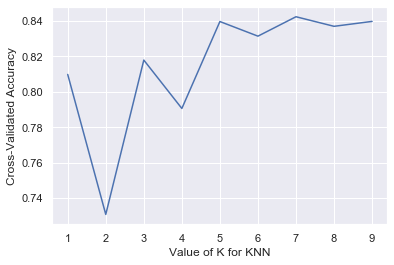

In [173]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Maximum Accuracy comes out for K value of 9

## Model 3 - DecisionTree Classifier

In [174]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
print('train_score=',train_score)
print('test_score=',test_score)

train_score= 0.8738656987295825
test_score= 0.8396739130434783


### Decision Tree Classifier With GridSearch cross validation

In [175]:
# Train a Decision Tree model, the best parameters, and model performance
# find the optimal max_depth

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': [3,4,5,6,7,8,9,10],
              'splitter':["best","random"],
              'criterion':["gini","entropy"]}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

pred_dtree = grid_dtree.predict(X_test)

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))

train_score=grid_dtree.score(X_train,y_train)
test_score=grid_dtree.score(X_test,y_test)

# train and test score
print('DTree_train_score=',train_score)
print('Dtree_test_score=',test_score)

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}
Best Mean Cross-validation score: 0.85
DTree_train_score= 0.8593466424682396
Dtree_test_score= 0.8614130434782609


In [176]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_dtree)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  8  50]
 [  1 309]]


In [177]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_dtree, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.89      0.14      0.24        58
         one       0.86      1.00      0.92       310

    accuracy                           0.86       368
   macro avg       0.87      0.57      0.58       368
weighted avg       0.87      0.86      0.82       368



We observed that train and test score for Decision Tree with Gridsearch Cross Validation is 0.8593 and 0.8614 and following are the best parameters as criterion:gini, max_depth: 4, splitter: random

### Feature Importance with Dtree Classifier

In [178]:
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel("Feature score")
plt.ylabel("Feature Name")
plt.show()

[0.05789286 0.04473066 0.         0.         0.         0.
 0.02153589 0.         0.04168116 0.         0.         0.12077276
 0.         0.2218246  0.         0.         0.         0.2290569
 0.         0.         0.         0.         0.         0.10753443
 0.         0.02604526 0.         0.         0.         0.0701155
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05880999]


The Most important feature is OverTime followed by Monthly Income.

## Model 4 - Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'liblinear')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### Logistic Regression with GridSearch cross validation

In [181]:
log = LogisticRegression()
param_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1', 'l2'],'max_iter':[5,10,15,20,25,50,75,100]}


grid_log = GridSearchCV(log, param_log,return_train_score=True,cv=4)
grid_log.fit(X_train, y_train)
pred_log = grid_log.predict(X_test)
print('Logistic parameters: ', grid_log.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_log.best_score_))
train_score=grid_log.score(X_train,y_train)
test_score=grid_log.score(X_test,y_test)

print('Logreg_train_score=',train_score)
print('Logreg_test_score=',test_score)

Logistic parameters:  {'C': 10, 'max_iter': 5, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.88
Logreg_train_score= 0.8883847549909256
Logreg_test_score= 0.8858695652173914


In [182]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_log)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 24  34]
 [  8 302]]


In [183]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_log, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.75      0.41      0.53        58
         one       0.90      0.97      0.93       310

    accuracy                           0.89       368
   macro avg       0.82      0.69      0.73       368
weighted avg       0.88      0.89      0.87       368



We observed that train and test score for LogisticRegression with Gridsearch Cross Validation is 0.8884 and 0.8859 with following parameters as best: 
'C': 10, 'max_iter': 5, 'penalty': 'l2'

## Model 5 - Linear Support Vector Machine Classifier with Gridsearch cross validation

In [184]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'penalty':['l2']}
grid_svc = GridSearchCV(svc, param_svc,return_train_score=True)
grid_svc.fit(X_train, y_train)
pred_svc = grid_svc.predict(X_test)
print('SVC parameters: ', grid_svc.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svc.best_score_))
train_score=grid_svc.score(X_train,y_train)
test_score=grid_svc.score(X_test,y_test)

print('Linear_SVC_train_score=',train_score)
print('Linear_SVC_test_score=',test_score)

SVC parameters:  {'C': 10, 'penalty': 'l2'}
Best Mean Cross-validation score: 0.88
Linear_SVC_train_score= 0.8802177858439202
Linear_SVC_test_score= 0.8777173913043478


In [185]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svc)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 18  40]
 [  5 305]]


In [186]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svc, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.78      0.31      0.44        58
         one       0.88      0.98      0.93       310

    accuracy                           0.88       368
   macro avg       0.83      0.65      0.69       368
weighted avg       0.87      0.88      0.85       368



We observed that train and test score for Linear Support Vector Machine Classifier with Gridsearch Cross Validation is 0.8802 and 0.8777 with following parameters as best:'C': 10, 'penalty': 'l2'

## Model 6 - Support Vector Machine Classifier

### Linear kernel and GridSearch Cross Validation

In [187]:
from sklearn.svm import SVC

svc = SVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['linear']}
grid_svckl = GridSearchCV(svc, param_svc,return_train_score=True, cv=5)
grid_svckl.fit(X_train, y_train)
pred_svckl = grid_svckl.predict(X_test)
print('SVC parameters: ', grid_svckl.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckl.best_score_))
train_score=grid_svckl.score(X_train,y_train)
test_score=grid_svckl.score(X_test,y_test)

print('Linear_kernel_SVC_train_score=',train_score)
print('Linear_kernel_SVC test_score=',test_score)

SVC parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Cross-validation score: 0.88
Linear_kernel_SVC_train_score= 0.8874773139745916
Linear_kernel_SVC test_score= 0.8913043478260869


In [188]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svckl)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 21  37]
 [  3 307]]


In [189]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svckl, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.88      0.36      0.51        58
         one       0.89      0.99      0.94       310

    accuracy                           0.89       368
   macro avg       0.88      0.68      0.73       368
weighted avg       0.89      0.89      0.87       368



We observed that train and test score for Linear Support Vector Machine with Linear Kernel Gridsearch Cross Validation is 0.8875 and 0.8913 with following parameters as best:'C': 10, 'gamma': 0.001.

### Polynomial kernel and GridSearch Cross Validation

In [190]:
from sklearn.svm import SVC

svc = SVC()

param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['poly']}
grid_svckp = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckp.fit(X_train, y_train)
pred_svckp = grid_svckp.predict(X_test)
print('SVC parameters: ', grid_svckp.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckp.best_score_))
train_score=grid_svckp.score(X_train,y_train)
test_score=grid_svckp.score(X_test,y_test)

print('Poly_SVC_train_score=',train_score)
print('Poly_SVC_test _score=',test_score)

SVC parameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Mean Cross-validation score: 0.84
Poly_SVC_train_score= 0.9800362976406534
Poly_SVC_test _score= 0.8505434782608695


In [191]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svckp)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 14  44]
 [ 11 299]]


In [192]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svckp, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.56      0.24      0.34        58
         one       0.87      0.96      0.92       310

    accuracy                           0.85       368
   macro avg       0.72      0.60      0.63       368
weighted avg       0.82      0.85      0.82       368



We observed that train and test score for Linear Support Vector Machine with Polynomial Kernel Gridsearch Cross Validation is 0.9800 and 0.8505 with following parameters as best:'C': 0.1, 'gamma': 0.1

### Rbf kernel and Gridsearch Cross Validation

In [193]:
from sklearn.svm import SVC

svc = SVC()
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1, 10],'kernel':['rbf']}
grid_svckr = GridSearchCV(svc, param_svc,return_train_score=True,cv=5)
grid_svckr.fit(X_train, y_train)
pred_svckr = grid_svckr.predict(X_test)
print('SVC parameters: ', grid_svckr.best_params_)
print("Best Mean Cross-validation score: {:.2f}".format(grid_svckr.best_score_))
train_score=grid_svckr.score(X_train,y_train)
test_score=grid_svckr.score(X_test,y_test)

print('Rbf_SVC_train_score=',train_score)
print('Rbf_SVC_test_score=',test_score)

SVC parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Mean Cross-validation score: 0.86
Rbf_SVC_train_score= 0.941016333938294
Rbf_SVC_test_score= 0.8695652173913043


In [194]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_svckr)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 22  36]
 [ 12 298]]


In [195]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_svckr, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.65      0.38      0.48        58
         one       0.89      0.96      0.93       310

    accuracy                           0.87       368
   macro avg       0.77      0.67      0.70       368
weighted avg       0.85      0.87      0.85       368



We observed that train and test score for Linear Support Vector Machine with rbf Kernel Gridsearch Cross Validation is 0.9410 and 0.8696 with following parameters as best :'C': 10, 'gamma': 0.01

### Accuracies of models after PCA

In [4]:
# Index Levels
outside = ['After PCA','After PCA']
inside = ['Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [5]:
data_class = np.array([(85.21,85.93,94.00,88.04,88.75,98.00,94.10),
                     (85.32,86.14,88.59,87.77,89.13,85.05,86.96)])

In [6]:
df = pd.DataFrame(data_class,index=hier_index,columns=['KNN','Decision Tree','Logistic Regression','Linear SVM', 'SVM Linear kernel', 'SVM Poly kernel','SVM RBF kernel'])

In [7]:
import seaborn as sns

cm = sns.light_palette("#9b59b6", as_cmap=True)

s = df.style.background_gradient(cmap="YlGnBu")
s

## Conclusion: 

### We can conclude that our best classification model is SVM With Linear Kernel.

## Deep Learning Model

In [202]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

In [203]:
X =data.drop(['Attrition'],axis=1)
target = data['Attrition']
y = pd.DataFrame(target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

In [204]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=39, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [205]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [206]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1102/1102 [==============================] - 1s 493us/step - loss: 74.5317 - accuracy: 0.7868
Epoch 2/150
1102/1102 [==============================] - 0s 111us/step - loss: 2.2294 - accuracy: 0.7777
Epoch 3/150
1102/1102 [==============================] - 0s 129us/step - loss: 0.9520 - accuracy: 0.7160
Epoch 4/150
1102/1102 [==============================] - 0s 129us/step - loss: 0.7872 - accuracy: 0.7114
Epoch 5/150
1102/1102 [==============================] - 0s 115us/step - loss: 0.6932 - accuracy: 0.7087
Epoch 6/150
1102/1102 [==============================] - 0s 171us/step - loss: 0.6312 - accuracy: 0.7278
Epoch 7/150
1102/1102 [==============================] - 0s 110us/step - loss: 0.5877 - accuracy: 0.8076
Epoch 8/150
1102/1102 [==============================] - 0s 185us/step - loss: 0.5647 - accuracy: 0.8140
Epoch 9/150
1102/1102 [==============================] - 0s 171us/step - loss: 0.5180 - accuracy: 0.8194
Epoch 10/150
1102/1102 [==============================

In [207]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

368/368 [==============================] - 0s 133us/step

accuracy: 84.24%


In [208]:
y_predict = model.predict(X_test)
y_predict

array([[0.7682541 ],
       [0.7431463 ],
       [0.7734369 ],
       [0.86959946],
       [0.72628903],
       [0.72628903],
       [0.7637399 ],
       [0.8043904 ],
       [0.8947717 ],
       [0.7898957 ],
       [0.9428333 ],
       [0.7284125 ],
       [0.8691935 ],
       [0.760422  ],
       [0.811953  ],
       [0.8206944 ],
       [0.85747206],
       [0.7978934 ],
       [0.8304246 ],
       [0.72628903],
       [0.77847385],
       [0.8660501 ],
       [0.798738  ],
       [0.8714589 ],
       [0.75635874],
       [0.8283453 ],
       [0.72628903],
       [0.92382777],
       [0.72628903],
       [0.8276795 ],
       [0.8232834 ],
       [0.8006761 ],
       [0.8730579 ],
       [0.80933666],
       [0.85930383],
       [0.81528664],
       [0.89574677],
       [0.75753856],
       [0.76237035],
       [0.75776124],
       [0.76670986],
       [0.8620709 ],
       [0.9554182 ],
       [0.8563869 ],
       [0.80194896],
       [0.72628903],
       [0.7844435 ],
       [0.822

In [209]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [210]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=39, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [211]:
seed = 10
np.random.seed(10)

In [212]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [213]:
grid_search_result = grid_search.fit(X_train, y_train)
pred_grid = grid_search.predict(X_test)

print('best parameters: ', grid_search.best_params_)

train_score=grid_search.score(X_train,y_train)
test_score=grid_search.score(X_test,y_test)
print('train_score=',train_score)
print('test_score=',test_score)

best parameters:  {'batch_size': 40, 'epochs': 100}
train_score= 0.8375680446624756
test_score= 0.842391312122345


In [214]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_grid)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[  1  57]
 [  1 309]]


In [215]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_grid, target_names=["zero", "one"]))

              precision    recall  f1-score   support

        zero       0.50      0.02      0.03        58
         one       0.84      1.00      0.91       310

    accuracy                           0.84       368
   macro avg       0.67      0.51      0.47       368
weighted avg       0.79      0.84      0.78       368



We observed that for Neural Networks train score is 0.8375 and test score is 0.8424. The best parameters are 'batch_size': 40, 'epochs': 100